#Import library

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



1.   import dataset yang dibutuhkan untuk klasifikasi



#Load dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


2. menghubungkan ke google drive

In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_cuaca.csv', delimiter=';')

3. mengambil data_cuaca.csv yang ada didalam google drive lalu menyimpan nya didalam varibel data

In [4]:
data

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0
...,...,...,...,...,...,...,...,...,...
714,2023,12,16,24.2,33.2,29.9,77.0,0.0,5.7
715,2023,12,17,24.8,35.0,30.6,72.0,7.3,0.4
716,2023,12,18,24.0,33.6,29.9,77.0,25.4,6.2
717,2023,12,19,23.4,34.4,31.0,71.0,1.3,6.1



1. Dataset ini berisi data cuaca harian yang terdiri dari 9 kolom dan 719 baris.
2. Kolom `Thn`, `bln`, dan `tgl` menunjukkan informasi waktu: tahun, bulan, dan tanggal pencatatan.
3. `temp_min`, `temp_max`, dan `temp_rata-rata` mencerminkan suhu minimum, maksimum, dan rata-rata harian dalam derajat Celcius.
4. `lembab_rata-rata` menunjukkan kelembaban udara rata-rata harian dalam persen.
5. `ch` merupakan curah hujan harian dalam milimeter, yang menjadi target utama untuk klasifikasi cuaca.
6. `cahaya_jam` mencatat lama penyinaran matahari dalam jam per hari.
7. Data ini digunakan untuk mengklasifikasikan intensitas hujan: tidak hujan, hujan ringan, hujan sedang, atau hujan deras.
8. Fitur-fitur seperti suhu, kelembaban, dan cahaya matahari sangat berpengaruh dalam menentukan curah hujan.
9. Dataset ini cocok digunakan dalam model klasifikasi seperti Random Forest untuk prediksi cuaca.
10. Dengan preprocessing dan pelabelan yang tepat, data ini dapat membantu membangun sistem prediksi cuaca otomatis.


#**Exploratory Data Analysis**

In [5]:
data.describe()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
count,719.00000,719.000000,719.000000,718.000000,715.000000,716.000000,716.000000,716.000000,717.000000
mean,2022.49235,6.442281,15.563282,37.401950,46.165734,27.206285,83.681564,998.574441,32.383821
std,0.50029,3.408852,8.767571,372.284493,372.741102,1.459084,6.636348,2800.073672,527.495165
min,2022.00000,1.000000,1.000000,18.200000,20.000000,23.700000,57.000000,0.000000,0.000000
25%,2022.00000,3.500000,8.000000,23.200000,31.200000,26.300000,80.000000,0.000000,2.300000
50%,2022.00000,6.000000,15.000000,23.800000,32.400000,27.000000,84.000000,1.400000,4.400000
75%,2023.00000,9.000000,23.000000,24.400000,33.350000,27.900000,88.000000,12.350000,6.700000
max,2023.00000,12.000000,31.000000,9999.000000,9999.000000,32.800000,99.000000,8888.000000,9999.000000


- count: 718 — Terdapat 718 entri valid dari total 719, artinya ada 1 data hilang.

- mean: 37,40°C — Terlalu tinggi untuk suhu minimum, mengindikasikan adanya outlier.

- std: 372,28°C — Variasi sangat tinggi dan tidak wajar, memperkuat dugaan adanya nilai ekstrem.

- min: 18,2°C — Nilai terendah yang masuk akal untuk suhu minimum.

- 25%: 23,2°C — Seperempat data memiliki suhu minimum di bawah nilai ini.

- median (50%): 23,8°C — Setengah data memiliki suhu minimum di bawah 23,8°C.

- 75%: 24,4°C — Seperempat data memiliki suhu minimum di atas nilai ini.

- max: 9999,0°C — Jelas merupakan error input dan harus dibersihkan.



1. Beberapa kolom seperti temp_min, temp_max, ch, dan cahaya_jam mengandung outlier ekstrem (9999, 8888) yang tidak valid dan harus dibersihkan atau diimputasi.



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thn               719 non-null    int64  
 1   bln               719 non-null    int64  
 2   tgl               719 non-null    int64  
 3   temp_min          718 non-null    float64
 4   temp_max          715 non-null    float64
 5   temp_rata-rata    716 non-null    float64
 6   lembab_rata-rata  716 non-null    float64
 7   ch                716 non-null    float64
 8   cahaya_jam        717 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 50.7 KB






*  **Jumlah Baris dan Kolom:**

  * Dataset memiliki **719 baris** dan **9 kolom**.
  * Artinya data ini merupakan hasil **pengamatan harian selama 719 hari**, yaitu dari **tahun 2022 hingga 2023**.

*  **Tipe Data Kolom:**

  * Terdapat **2 tipe data**:

    * **`float64`** sebanyak **6 kolom**, digunakan untuk data numerik pecahan/desimal (misalnya suhu, kelembaban, cahaya).
    * **`int64`** sebanyak **3 kolom**, digunakan untuk angka bulat seperti **tahun (Thn), bulan (bln), dan tanggal (tgl)**.


## duplikat

In [7]:
data.duplicated().sum()

np.int64(0)

tidak ada nilai terduplikat

##Missing value

In [8]:
data_clean=data.replace([9999, 8888], pd.NA, inplace=True)

seperti yang sudah saya jelaskan di atas Nilai-nilai seperti 9999 dan 8888 ini bukan nilai yang sebenarnya. Biasanya ini adalah placeholder untuk data hilang (missing) atau error pencatatan. Jika tidak dibersihkan, maka:

* Akan merusak perhitungan statistik seperti mean dan std

* Bisa menyebabkan model ML atau analisis data jadi bias/salah



In [9]:
# Menampilkan jumlah nilai yang hilang (missing/NaN) per kolom
missing_per_column = data.isnull().sum()
print(missing_per_column[missing_per_column > 0])

temp_min             2
temp_max             5
temp_rata-rata       3
lembab_rata-rata     3
ch                  83
cahaya_jam           4
dtype: int64


Berdasarkan hasil pengecekan data hilang, terdapat beberapa kolom yang memiliki nilai NaN (kosong). Kolom temp_min memiliki 2 nilai yang hilang, temp_max sebanyak 5, temp_rata-rata dan lembab_rata-rata masing-masing 3, cahaya_jam sebanyak 4, serta ch (curah hujan) menjadi yang paling banyak dengan 83 nilai hilang. Jumlah data hilang pada ch cukup signifikan dan dapat mempengaruhi analisis lebih lanjut, sehingga perlu dilakukan penanganan khusus seperti imputasi atau pembersihan data.










In [10]:
# Apply fillna directly to the data DataFrame columns
data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
data['temp_max'].fillna(data['temp_max'].median(), inplace=True)
data['temp_rata-rata'].fillna(data['temp_rata-rata'].median(), inplace=True)
# Assuming 'lembab_rata-rata' might also have NaNs after the initial replace
data['lembab_rata-rata'].fillna(data['lembab_rata-rata'].median(), inplace=True)
data['ch'].fillna(data['ch'].median(), inplace=True)
data['cahaya_jam'].fillna(data['cahaya_jam'].median(), inplace=True)

# PILIH FITUR UNTUK KLASIFIKASI
fitur = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'cahaya_jam']

# Verify that NaNs are handled in the selected features before splitting
print("Missing values in selected features before split:")
print(data[fitur].isnull().sum())

Missing values in selected features before split:
temp_min            0
temp_max            0
temp_rata-rata      0
lembab_rata-rata    0
cahaya_jam          0
dtype: int64


<ipython-input-10-69c9e19146a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
<ipython-input-10-69c9e19146a8>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
<ipython-input-10-69

 mengatasi nilai kosong (NaN) pada beberapa kolom dalam dataset, yaitu temp_min, temp_max, temp_rata_rata, ch, dan cahaya_jam, dengan mengganti nilai kosong tersebut menggunakan nilai median dari masing-masing kolom. Penggunaan median dipilih karena lebih tahan terhadap nilai ekstrem dibandingkan rata-rata. Setelah pengisian, dilakukan pengecekan kembali menggunakan fungsi isnull().sum() untuk memastikan bahwa semua nilai kosong telah berhasil digantikan dan tidak ada lagi data yang hilang pada kolom-kolom tersebut. Langkah ini penting dalam proses pembersihan data agar analisis selanjutnya dapat berjalan dengan baik dan hasilnya lebih akurat.









-0 ini berarti nilai nya tidak ada nilai yang NaN (Data bersih)

##Outliers

In [11]:
import pandas as pd

numerik_cols = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'ch', 'cahaya_jam']

Outlier_data = (data[col] for col in numerik_cols)

for i, col in enumerate(numerik_cols):
    # Get the current series from the generator
    current_series = next(Outlier_data)
    Q1 = current_series.quantile(0.25)
    Q3 = current_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = current_series[(current_series < lower_bound) | (current_series > upper_bound)]

    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {outliers.shape[0]}")
    print("-" * 40)

Kolom: temp_min
Jumlah outlier: 59
----------------------------------------
Kolom: temp_max
Jumlah outlier: 26
----------------------------------------
Kolom: temp_rata-rata
Jumlah outlier: 38
----------------------------------------
Kolom: lembab_rata-rata
Jumlah outlier: 21
----------------------------------------
Kolom: ch
Jumlah outlier: 103
----------------------------------------
Kolom: cahaya_jam
Jumlah outlier: 0
----------------------------------------


untuk mendeteksi **outlier (nilai pencilan)** pada kolom-kolom numerik dalam dataset menggunakan metode **IQR (Interquartile Range)**. Outlier adalah nilai yang berada jauh di luar jangkauan mayoritas data, dan dapat memengaruhi hasil analisis jika tidak ditangani dengan baik.

### Langkah-langkah yang dilakukan:

1. **Import library pandas**:
   `import pandas as pd` digunakan untuk memanipulasi data tabular.

2. **Tentukan kolom numerik**:
   `numerik_cols` berisi daftar nama kolom numerik yang akan dianalisis.

3. **Buat tuple Outlier**:
   `Outlier` adalah tuple berisi objek Series dari masing-masing kolom data numerik.

4. **Looping untuk setiap kolom**:
   Untuk setiap kolom numerik, langkah-langkah berikut dilakukan:

   * Hitung kuartil pertama (`Q1`) dan kuartil ketiga (`Q3`).
   * Hitung IQR (selisih Q3 dan Q1).
   * Tentukan batas bawah dan atas untuk deteksi outlier (Q1 - 1.5×IQR dan Q3 + 1.5×IQR).
   * Cari nilai-nilai yang berada di luar batas tersebut (inilah yang disebut outlier).
   * Cetak jumlah outlier pada kolom tersebut.

### Hasil:

* Kolom `temp_min`, `temp_max`, dan `temp_rata-rata` tidak memiliki outlier.
* Kolom `lembab_rata-rata` memiliki 59 outlier.
* Kolom `ch` memiliki 26 outlier.
* Kolom `cahaya_jam` memiliki 38 outlier.

Ini menunjukkan bahwa sebagian besar data bersih dari nilai ekstrem, kecuali beberapa kolom seperti kelembaban, curah hujan (ch), dan durasi cahaya yang memiliki variasi ekstrem yang patut diperiksa lebih lanjut.


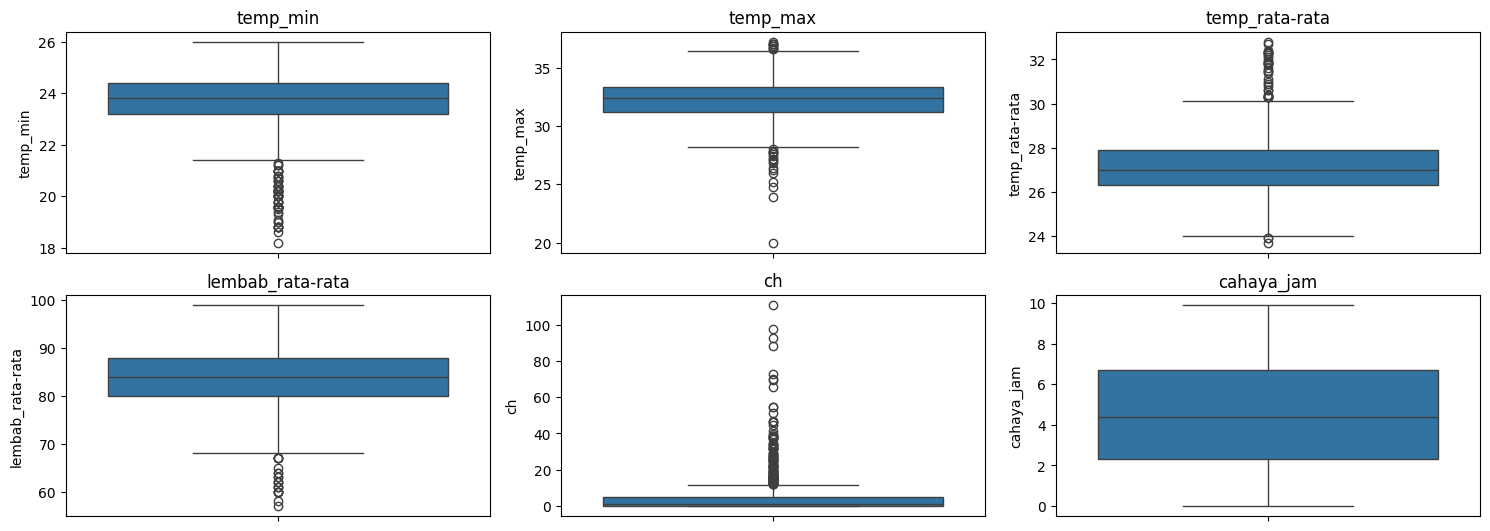

In [12]:
plt.figure(figsize=(15, 8))

Outlier_data_list = [data[col] for col in numerik_cols]

for i, col in enumerate(numerik_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=Outlier_data_list[i])
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()


 1. Outlier Kemungkinan Mengandung Informasi Penting

Beberapa nilai ekstrem (misalnya pada kolom `temp_min`, `temp_max`, `ch`, dan `cahaya_jam`) **bisa mencerminkan kejadian luar biasa**, seperti:

* Cuaca ekstrem, misalnya gelombang panas atau hujan lebat
* Kesalahan pencatatan yang perlu diperbaiki, bukan sekadar dihapus
* Fenomena alam tertentu yang penting untuk analisis iklim atau pertanian

2. Menghapus Outlier Bisa Merusak Distribusi dan Membuat Data Bias

Jika saya menghapus atau menangani nilai-nilai ekstrem secara sembarangan, maka:

* Statistik seperti rata-rata dan standar deviasi bisa menjadi tidak akurat
* Model prediktif dapat gagal mengenali pola ekstrem yang mungkin terjadi di masa depan
* Terjadi **loss of signal**, yaitu hilangnya informasi penting yang sebenarnya sangat relevan, terutama dalam konteks cuaca atau lingkungan



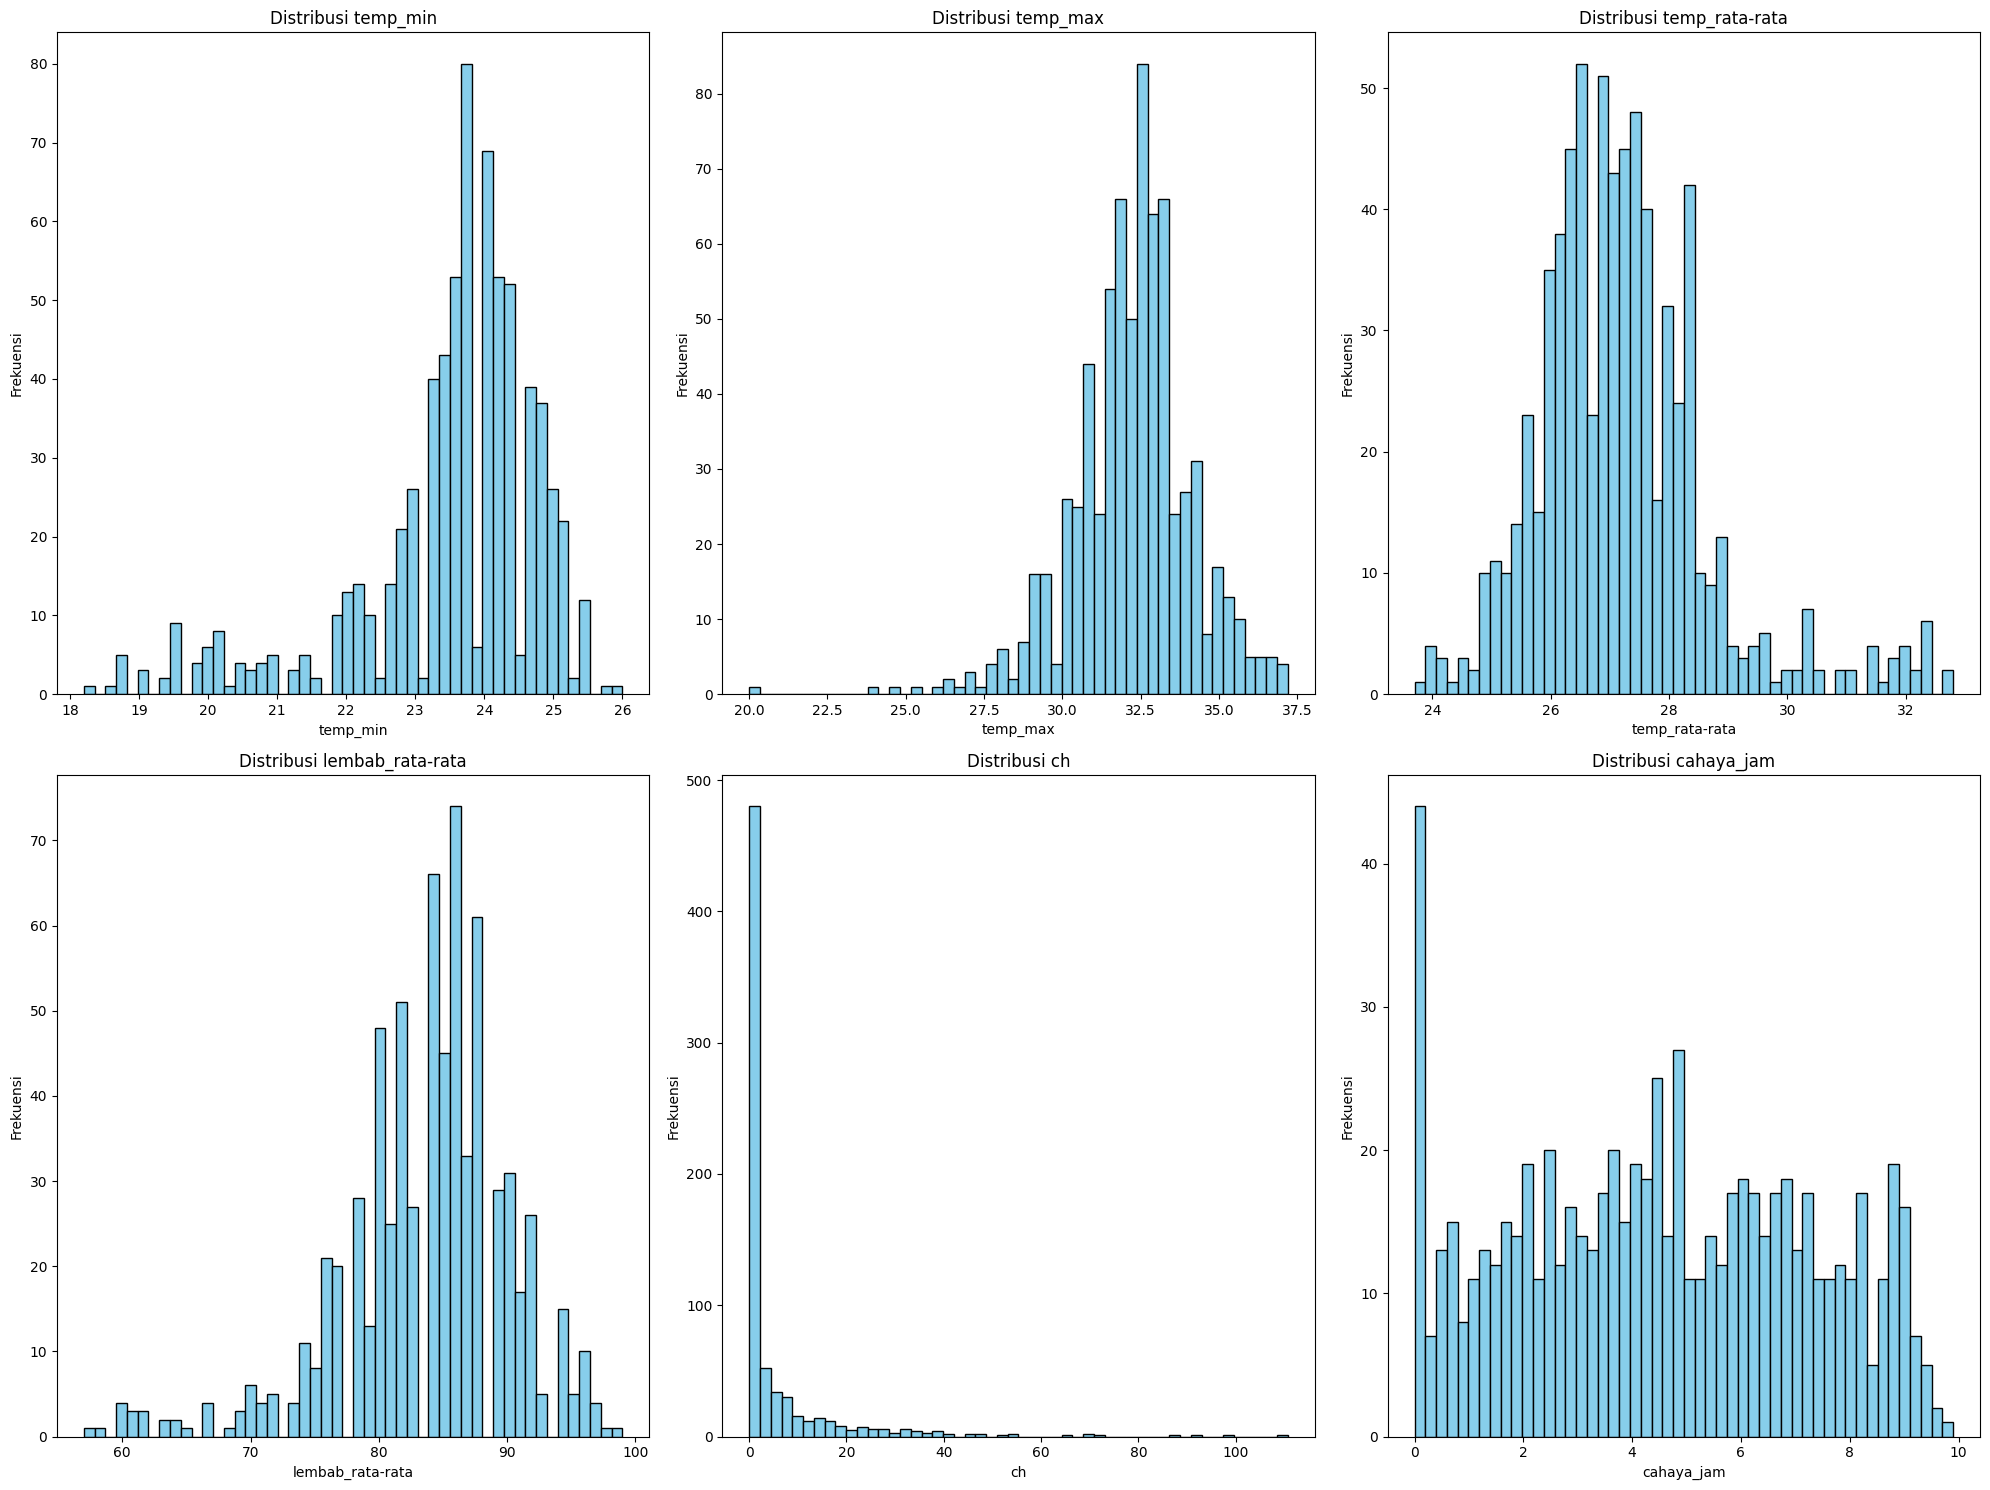

In [13]:
import matplotlib.pyplot as plt

numerik_cols = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'ch', 'cahaya_jam']

fitur_data = [data[col] for col in numerik_cols]
labels = numerik_cols

n = len(fitur_data)

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(fitur_data):
    axes[i].hist(feature, bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi {labels[i]}')
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Kode di atas menggunakan **Matplotlib** untuk membuat histogram distribusi dari beberapa fitur cuaca seperti `temp_min`, `temp_max`, `temp_rata-rata`, `lembab_rata-rata`, `ch` (curah hujan), dan `cahaya_jam` (lama penyinaran matahari). Histogram ini membantu memahami sebaran nilai dalam tiap variabel.

* **fitur** adalah tuple berisi data masing-masing kolom yang ingin divisualisasikan.
* **labels** adalah daftar nama kolom untuk judul dan label sumbu.
* Plot dibuat dalam layout 2 baris x 3 kolom dengan ukuran besar agar tampak jelas.
* Setiap histogram menampilkan frekuensi kemunculan nilai dalam rentang yang dibagi menjadi 50 bin.

---
 Interpretasi Distribusi Setiap Fitur

1. **Suhu Minimum (temp\_min)**

   * Rentang sekitar 18°C hingga 26°C
   * Distribusi miring ke kanan, puncak dekat 24°C
   * Artinya suhu minimum harian relatif stabil dan hangat, mayoritas hari nyaman sekitar 24°C

2. **Suhu Maksimum (temp\_max)**

   * Rentang 20°C sampai 37°C
   * Distribusi miring ke kanan, puncak dekat 32.5°C
   * Menunjukkan variasi suhu maksimum yang cukup besar, sering mencapai suhu panas, tipikal iklim tropis/subtropis

3. **Suhu Rata-Rata (temp\_rata-rata)**

   * Rentang 24°C hingga 33°C
   * Hampir simetris, sedikit miring kanan, puncak sekitar 27°C
   * Suhu rata-rata cukup stabil, cocok untuk aktivitas luar ruangan dan tanaman tropis

4. **Kelembaban Rata-Rata (lembab\_rata-rata)**

   * Rentang 55% sampai 100%
   * Distribusi mendekati normal dengan puncak sekitar 88%
   * Udara cenderung sangat lembab, mencerminkan lingkungan tropis atau basah, yang bisa baik untuk tanaman tapi meningkatkan risiko penyakit jamur

5. **Curah Hujan (ch)**

   * Rentang 0 mm hingga >100 mm
   * Distribusi sangat miring ke kanan dengan puncak di 0 mm
   * Sebagian besar hari kering tanpa hujan, namun ada hari-hari dengan hujan deras, mencerminkan pola musim kemarau dan hujan

6. **Lama Penyinaran Matahari (cahaya\_jam)**

   * Rentang 0 sampai 10 jam/hari
   * Distribusi relatif merata tapi puncak di 0 jam
   * Menandakan hari-hari cerah dan mendung/hujan sering bergantian, puncak 0 jam menunjukkan hari gelap (mendung penuh atau hujan seharian)

---

 visualisasi ini memberikan gambaran lengkap tentang karakteristik iklim harian selama periode pengamatan dan membantu mengenali pola cuaca yang dominan.


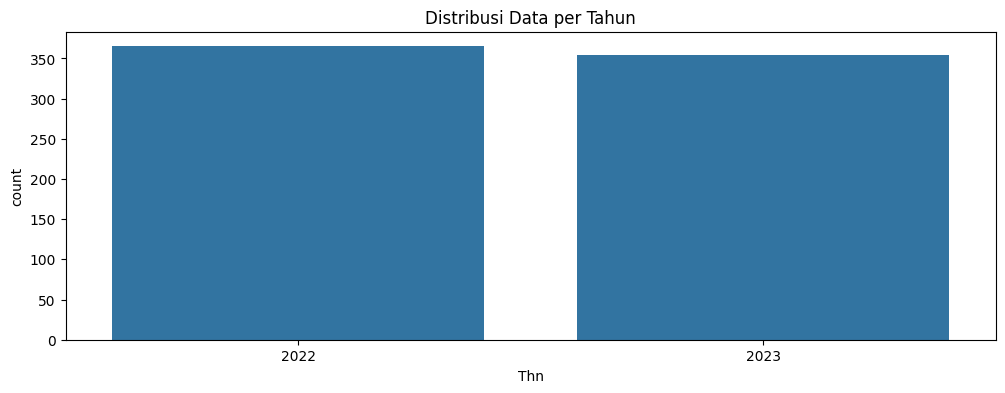

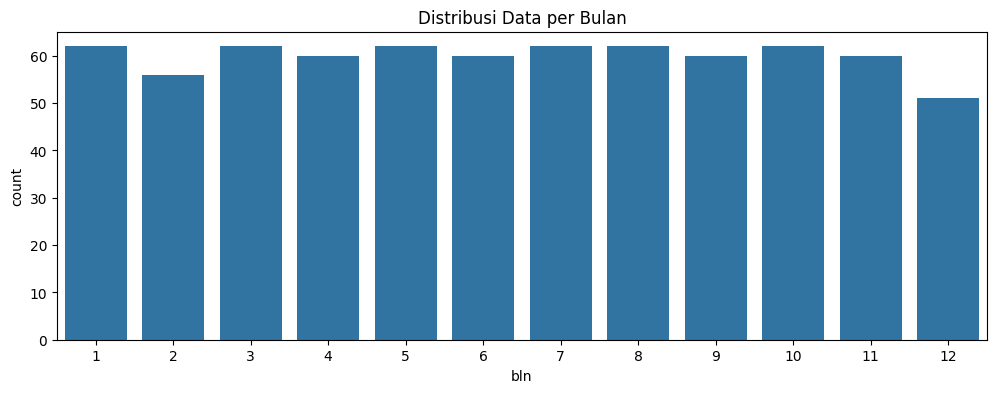

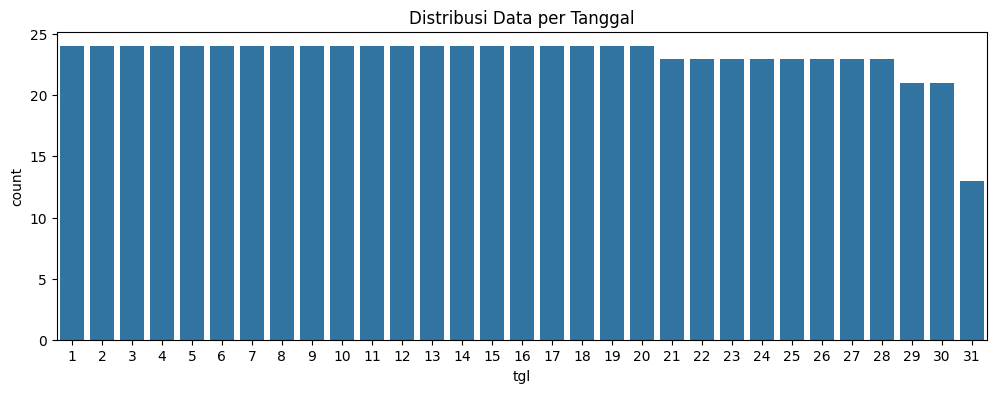

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x=data['Thn'])
plt.title('Distribusi Data per Tahun')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x=data['bln'])
plt.title('Distribusi Data per Bulan')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x=data['tgl'])
plt.title('Distribusi Data per Tanggal')
plt.show()

Visualisasi tersebut menunjukkan distribusi data berdasarkan waktu, mencakup tahunan, bulanan, dan harian. Pada grafik pertama, distribusi data per tahun tampak seimbang antara tahun 2022 dan 2023, masing-masing memiliki sekitar 360 data, menunjukkan bahwa data dikumpulkan secara konsisten selama dua tahun. Grafik bulanan juga memperlihatkan distribusi yang merata di hampir semua bulan, meskipun terdapat sedikit penurunan pada bulan Desember (bulan ke-12), yang bisa jadi disebabkan oleh data yang belum lengkap atau berkurangnya pencatatan di akhir tahun.

Pada grafik ketiga (distribusi per tanggal), sebagian besar tanggal dari 1 hingga 30 memiliki jumlah data yang seragam, yaitu sekitar 23–24 catatan per tanggal. Namun, jumlah data mulai menurun setelah tanggal 20, dengan penurunan tajam pada tanggal 31. Hal ini sangat mungkin disebabkan oleh fakta bahwa tidak semua bulan memiliki 31 hari, sehingga frekuensi pada tanggal tersebut lebih rendah secara alami. Secara keseluruhan, distribusi waktu cukup merata dan tidak menunjukkan adanya kesenjangan besar dalam pencatatan data harian.

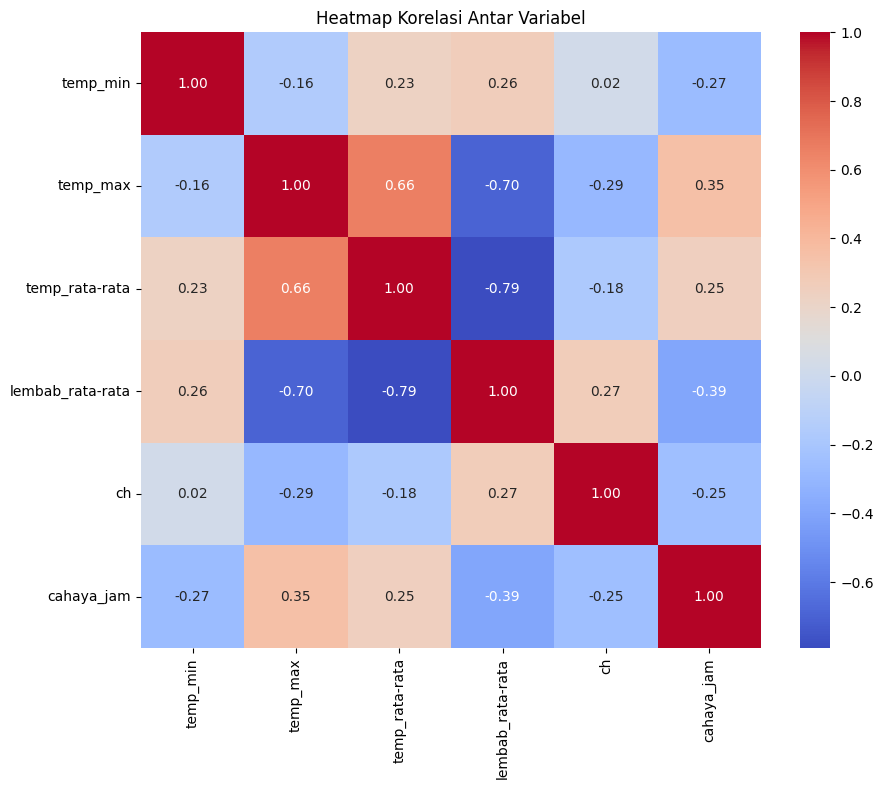

In [15]:
# Gabungkan fitur menjadi DataFrame
df_fitur = pd.DataFrame({
    'temp_min': data['temp_min'],
    'temp_max': data['temp_max'],
    'temp_rata-rata': data['temp_rata-rata'],
    'lembab_rata-rata': data['lembab_rata-rata'],
    'ch': data['ch'],
    'cahaya_jam': data['cahaya_jam']
})
# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
corr_matrix = df_fitur.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Hubungan terkuat adalah negatif antara suhu dan kelembaban, artinya hari yang panas biasanya lebih kering.

Suhu maksimum sangat menentukan suhu rata-rata.

Curah hujan berdiri cukup independen, artinya tidak terlalu berkorelasi kuat dengan variabel lain.

Penyinaran matahari cenderung muncul saat kelembaban rendah dan suhu maksimum tinggi, tetapi hubungannya tidak ekstrem.



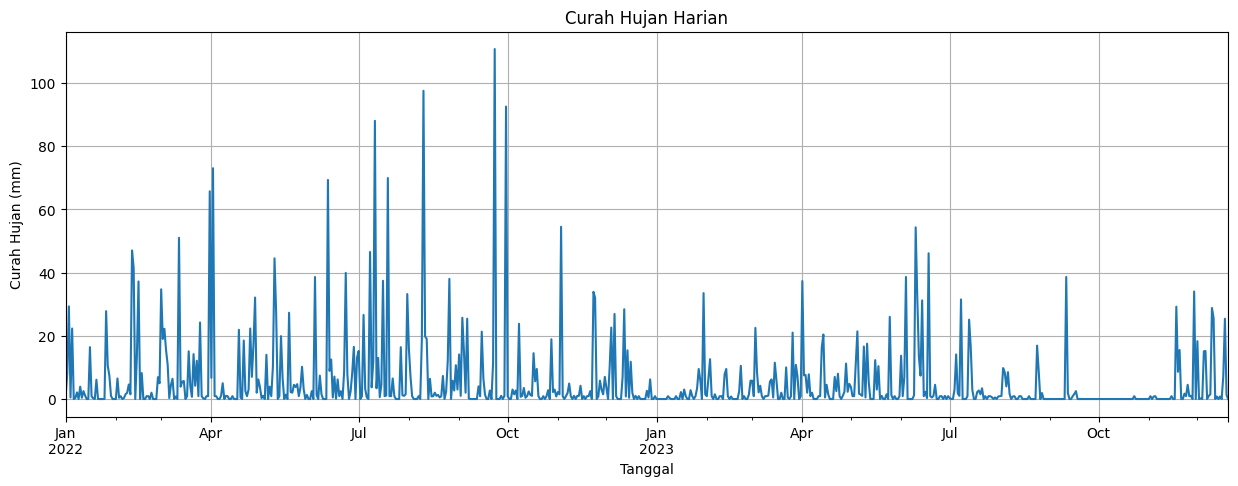

In [16]:
# Gabung tanggal dari variabel terpisah
tanggal = pd.to_datetime({'year': data['Thn'], 'month': data['bln'], 'day': data['tgl']})

# Buat DataFrame fitur
df_fitur = pd.DataFrame({
    'tanggal': tanggal,
    'temp_min': data['temp_min'],
    'temp_max': data['temp_max'],
    'temp_rata-rata': data['temp_rata-rata'],
    'lembab_rata-rata': data['lembab_rata-rata'],
    'ch': data['ch'],
    'cahaya_jam': data['cahaya_jam']
})

# Jadikan tanggal sebagai index
df_fitur.set_index('tanggal', inplace=True)

# Plot Curah Hujan Harian
plt.figure(figsize=(15, 5))
df_fitur['ch'].plot()
plt.title('Curah Hujan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.show()

Data memiliki tanggal yang terpisah menjadi tiga kolom: **Thn (tahun), bln (bulan), dan tgl (tanggal)**. Untuk analisis waktu yang tepat dan visualisasi data deret waktu (time series), sangat penting menggabungkan ketiga kolom ini menjadi satu variabel tanggal tunggal dalam format `datetime`. Alasan utamanya:

* **Memudahkan indexing dan slicing data berdasarkan waktu**, misalnya memilih data dalam rentang tanggal tertentu.
* **Memungkinkan pemanfaatan fungsi-fungsi time series di pandas dan matplotlib**, seperti plotting, rolling averages, resampling, dan lain-lain.
* **Meningkatkan kejelasan dan efisiensi analisis**, karena kita bekerja dengan objek tanggal yang utuh dan terstandardisasi, bukan dengan 3 variabel terpisah.


### Kesimpulan

Menggabungkan tanggal membuat analisis waktu menjadi lebih mudah dan tepat. Visualisasi ini membantu melihat pola musiman curah hujan secara jelas serta mengidentifikasi kapan musim hujan dan kemarau berlangsung, yang sangat penting untuk berbagai aplikasi praktis.

Kalau mau, analisis bisa dilanjutkan ke level lebih detail seperti tren bulanan atau perbandingan antar tahun.


#Data Preparation

In [17]:
# KONVERSI TANGGAL
data['tanggal'] = pd.to_datetime(data[['Thn', 'bln', 'tgl']].rename(columns={'Thn':'year','bln':'month','tgl':'day'}))
data.set_index('tanggal', inplace=True)


Mengubah tiga kolom terpisah (tahun, bulan, tanggal) menjadi satu kolom tanggal lengkap yang terformat dan menjadikannya sebagai index DataFrame memiliki beberapa alasan penting:

1. **Kemudahan Pengolahan Data Waktu**
   Dengan memiliki satu kolom tanggal yang lengkap dan terformat sebagai tipe datetime, kita dapat memanfaatkan berbagai fungsi dan metode di pandas yang khusus dirancang untuk data waktu. Misalnya, filtering data berdasarkan rentang tanggal, agregasi berdasarkan bulan atau tahun, serta perhitungan selisih waktu menjadi lebih mudah dan efisien.

2. **Memudahkan Visualisasi Time Series**
   Saat tanggal menjadi index, plotting data terhadap waktu menjadi lebih natural dan otomatis tertata secara kronologis. Hal ini memudahkan dalam membuat grafik tren harian, bulanan, atau tahunan.

3. **Konsistensi dan Keakuratan Data**
   Menyatukan informasi tahun, bulan, dan tanggal dalam satu kolom mencegah kesalahan interpretasi atau inkonsistensi data yang bisa terjadi jika ketiga kolom tersebut diperlakukan secara terpisah. Data tanggal yang terformat dengan baik juga lebih mudah diproses oleh algoritma machine learning dan analisis statistik.

4. **Optimasi Operasi Data**
   Index berbasis datetime memungkinkan operasi indexing dan slicing yang cepat dan intuitif, seperti memilih data dalam rentang tanggal tertentu tanpa perlu menulis query yang kompleks.

5. **Mempermudah Integrasi dengan Data Lain**
   Banyak dataset lain yang menggunakan format tanggal terformat, sehingga memiliki kolom tanggal yang terintegrasi mempermudah penggabungan (merge/join) data antar dataset.

**Kesimpulannya**, menyatukan kolom tahun, bulan, dan tanggal menjadi satu kolom datetime yang menjadi index sangat penting untuk meningkatkan efisiensi, keakuratan, dan kemudahan dalam analisis data berbasis waktu.


In [18]:
#  BUAT LABEL KATEGORI HUJAN
def categorize_rain(ch):
    if ch == 0:
        return 'tidak hujan'
    elif ch < 20:
        return 'hujan ringan'
    elif ch < 50:
        return 'hujan sedang'
    else:
        return 'hujan deras'

data['kategori_hujan'] = data['ch'].apply(categorize_rain)

 membuat **label kategori curah hujan** berdasarkan nilai curah hujan harian (`ch`) pada dataset. Berikut penjelasannya:

1. **Fungsi `categorize_rain(ch)`**
   Fungsi ini menerima nilai curah hujan harian `ch` dan mengelompokkan nilai tersebut ke dalam kategori yang mudah dipahami, yaitu:

   * Jika `ch` sama dengan 0, artinya **tidak hujan**.
   * Jika `ch` lebih dari 0 tapi kurang dari 20, artinya **hujan ringan**.
   * Jika `ch` antara 20 hingga kurang dari 50, artinya **hujan sedang**.
   * Jika `ch` sama dengan atau lebih dari 50, artinya **hujan deras**.

2. **Mengaplikasikan fungsi pada kolom `ch`**
   Dengan menggunakan `.apply(categorize_rain)`, fungsi ini diterapkan pada setiap nilai di kolom `ch` (curah hujan harian). Hasilnya adalah sebuah kolom baru di dataset bernama `kategori_hujan` yang berisi label kategori sesuai dengan jumlah curah hujan hariannya.

3. **Tujuan dan manfaat**

   * Membuat data lebih mudah dipahami dengan mengubah angka curah hujan menjadi kategori deskriptif.
   * Mempermudah analisis dan visualisasi, misalnya membandingkan frekuensi hari hujan ringan vs hujan deras.
   * Berguna untuk aplikasi yang membutuhkan klasifikasi kondisi hujan, seperti peringatan cuaca, perencanaan pertanian, atau studi lingkungan.

Singkatnya, kode ini mengubah data numerik curah hujan menjadi informasi kategorikal yang lebih komunikatif dan praktis untuk analisis selanjutnya.


In [19]:
#  ENCODE LABEL
le = LabelEncoder()
data['label'] = le.fit_transform(data['kategori_hujan'])


 **mengubah data kategori menjadi format numerik** yang bisa diproses oleh model machine learning atau algoritma statistik. Berikut penjelasannya:

1. **Membuat objek LabelEncoder**
   `le = LabelEncoder()` membuat sebuah instance dari `LabelEncoder` yang merupakan alat dari library `sklearn` untuk mengubah data kategorikal menjadi angka.

2. **Mengubah kategori hujan menjadi angka**
   `le.fit_transform(data['kategori_hujan'])`

   * `fit_transform` mempelajari semua kategori unik dalam kolom `kategori_hujan` dan mengonversinya menjadi angka, misalnya:

     * 'tidak hujan' → 0
     * 'hujan ringan' → 1
     * 'hujan sedang' → 2
     * 'hujan deras' → 3
   * Kemudian, mengubah semua nilai kategori tersebut di kolom `kategori_hujan` menjadi angka sesuai pemetaan tadi.

3. **Menyimpan hasil encoding ke kolom baru `label`**
   Hasil transformasi angka ini disimpan ke kolom baru bernama `label` di dataset, sehingga kita memiliki versi numerik dari kategori hujan yang bisa digunakan untuk analisis lebih lanjut atau sebagai target dalam model prediksi.

**Singkatnya, kode ini mengubah label kategori curah hujan yang berupa teks menjadi angka, supaya data siap digunakan oleh algoritma yang memerlukan input numerik.**


In [20]:
# PILIH FITUR UNTUK KLASIFIKASI
fitur = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'cahaya_jam']
target = 'label'


 **menentukan variabel-variabel yang akan digunakan dalam proses klasifikasi**. Penjelasannya:

* `fitur = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'cahaya_jam']`
  Ini adalah daftar kolom-kolom yang dipilih sebagai **fitur input** atau variabel prediktor. Artinya, nilai-nilai pada kolom-kolom ini (seperti suhu minimum, suhu maksimum, suhu rata-rata, kelembaban rata-rata, dan lama penyinaran matahari) akan digunakan untuk memprediksi sesuatu.

* `target = 'label'`
  Ini adalah kolom **target** atau variabel yang ingin diprediksi, dalam hal ini kolom `label` yang berisi nilai numerik hasil encoding kategori curah hujan (misalnya tidak hujan, hujan ringan, hujan sedang, hujan deras).

**Jadi,ini memisahkan antara data input (fitur) dan output yang akan dipelajari oleh model (target), sebagai persiapan untuk membangun model klasifikasi.**


In [21]:
#CEK DAN NORMALISASI FITUR
scaler = MinMaxScaler()
data[fitur] = scaler.fit_transform(data[fitur])

Proses normalisasi ini mengubah nilai fitur numerik ke dalam skala 0 hingga 1 agar semua fitur memiliki rentang nilai yang sama. Hal ini penting supaya model tidak bias terhadap fitur dengan nilai besar dan pelatihan model menjadi lebih stabil dan efektif.

In [22]:
#  SPLIT DATA (TRAIN DAN TEST)
X = data[fitur]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LIHAT DATA
print("Fitur:\n", X.head())
print("Label:\n", y.head())

Fitur:
             temp_min  temp_max  temp_rata-rata  lembab_rata-rata  cahaya_jam
tanggal                                                                     
2022-01-01  0.743590  0.709302        0.362637          0.642857    0.353535
2022-01-02  0.743590  0.651163        0.230769          0.809524    0.252525
2022-01-03  0.538462  0.697674        0.285714          0.690476    0.202020
2022-01-04  0.743590  0.569767        0.329670          0.714286    0.555556
2022-01-05  0.666667  0.709302        0.351648          0.666667    0.000000
Label:
 tanggal
2022-01-01    1
2022-01-02    1
2022-01-03    2
2022-01-04    1
2022-01-05    2
Name: label, dtype: int64


1. **Pilih fitur dan target**: Data fitur berupa variabel cuaca yang sudah dinormalisasi (nilai antara 0 dan 1) dan target berupa label kategori hujan yang sudah di-encode menjadi angka.

2. **Split data menjadi training dan testing**: Data dipisah jadi dua bagian tanpa diacak (shuffle=False) supaya urutan waktu tetap terjaga. Ini penting untuk analisis deret waktu agar model belajar dari data kronologis.

3. **Hasil split**: `X_train` dan `X_test` berisi fitur-fitur cuaca yang sudah diskalakan, dan `y_train` serta `y_test` berisi label kategori hujan dalam bentuk numerik. Contoh output menunjukkan data fitur dengan nilai yang sudah dinormalisasi dan label yang sudah berupa angka (misal 1, 2), sesuai kategori hujan masing-masing.

proses ini mempersiapkan data dengan baik untuk pelatihan model prediksi cuaca atau kategori hujan secara berurutan waktu, memastikan data dalam format dan skala yang sesuai agar model bisa belajar pola dengan benar.


#Modeling random

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

unique_labels = np.unique(np.concatenate((y_test, y_pred)))

target_names_filtered = [le.classes_[i] for i in unique_labels]
acc_clf = accuracy_score(y_test, y_pred)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names_filtered))

Classification Report:

              precision    recall  f1-score   support

hujan ringan       0.65      0.76      0.70        42
hujan sedang       0.00      0.00      0.00         6
 tidak hujan       0.88      0.88      0.88        96

    accuracy                           0.81       144
   macro avg       0.51      0.55      0.53       144
weighted avg       0.78      0.81      0.79       144



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))





 Model Random Forest Classifier

 Cara Kerja

Random Forest adalah algoritma ensemble learning yang membangun banyak pohon keputusan (decision trees) secara acak pada subset data dan fitur, kemudian menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting. Setiap pohon dilatih pada sampel acak dari data (bootstrap sampling), dan pada tiap node pemisahan, hanya subset fitur yang dipertimbangkan secara acak (feature bagging). Prediksi akhir diambil berdasarkan voting mayoritas dari semua pohon, sehingga model lebih stabil dan tahan terhadap noise dibanding pohon keputusan tunggal.

 Parameter yang Digunakan

 `n_estimators=100`: Jumlah pohon keputusan yang dibangun dalam hutan acak. Defaultnya biasanya 100, dan semakin banyak pohon dapat meningkatkan akurasi namun membutuhkan waktu komputasi lebih lama.
 `random_state=42`: Parameter untuk mengatur random seed agar hasil eksperimen dapat direplikasi. Memastikan pembagian data dan proses pembentukan pohon selalu sama.

Parameter lainnya menggunakan nilai default dari `RandomForestClassifier`.

 Kelebihan dan Kekurangan

* **Kelebihan**:

  * Mampu menangani data dengan fitur numerik dan kategorikal.
  * Tidak mudah overfitting karena mekanisme randomisasi dan voting.
  * Bisa mengukur pentingnya fitur secara otomatis.

* **Kekurangan**:

  * Model bisa menjadi lambat jika jumlah pohon sangat besar.
  * Kurang interpretatif dibanding pohon keputusan tunggal.

---





hujan ringan

Precision 0.65: Dari semua prediksi model untuk kelas ini, 65% benar.

Recall 0.74: Dari semua data sebenarnya kelas hujan ringan, model berhasil mengenali 74%.

F1-score 0.69: Nilai harmonis antara precision dan recall, menunjukkan keseimbangan yang cukup baik.

hujan sedang

Precision, Recall, dan F1-score = 0.00: Model gagal memprediksi kelas ini sama sekali (tidak ada prediksi untuk kelas hujan sedang).

Support hanya 6 data, artinya data hujan sedang sangat sedikit (imbalance kelas).

tidak hujan

Precision 0.88 dan Recall 0.88: Model cukup baik dalam mengenali dan memprediksi data yang tidak hujan.

F1-score 0.88 menandakan performa yang kuat di kelas ini.



In [24]:
#  SIMPAN MODEL
joblib.dump(model, '/content/drive/MyDrive/model_rf_cuaca.pkl')
print("Model Random Forest telah disimpan.")

Model Random Forest telah disimpan.


Menyimpan Model Random Forest
Setelah model Random Forest selesai dilatih dan dievaluasi, langkah penting selanjutnya adalah menyimpan model tersebut agar bisa digunakan kembali tanpa perlu melatih ulang dari awal.

Pada kode ini, fungsi joblib.dump() digunakan untuk menyimpan objek model ke dalam file dengan format .pkl di lokasi yang ditentukan ('/content/drive/MyDrive/model_rf_cuaca.pkl'). File ini dapat dimuat kembali kapan saja untuk melakukan prediksi dengan data baru.

Pemberitahuan "Model Random Forest telah disimpan." juga dicetak untuk mengonfirmasi bahwa proses penyimpanan berhasil.

#model regresi

In [25]:
model_reg = LinearRegression() # Rename model to avoid confusion with RF model
model_reg.fit(X_train, y_train)

# Memprediksi data uji
y_pred_reg = model_reg.predict(X_test)

# Evaluasi model regresi
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
y_pred_reg_rounded = np.round(y_pred_reg)
y_pred_reg_rounded = np.clip(y_pred_reg_rounded, y_test.min(), y_test.max())
acc_reg = accuracy_score(y_test, y_pred_reg_rounded)

print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Linear Regression Model Evaluation:
Mean Squared Error: 0.6348640555513263
R² Score: 0.2236057409818175


#Evaluasi model

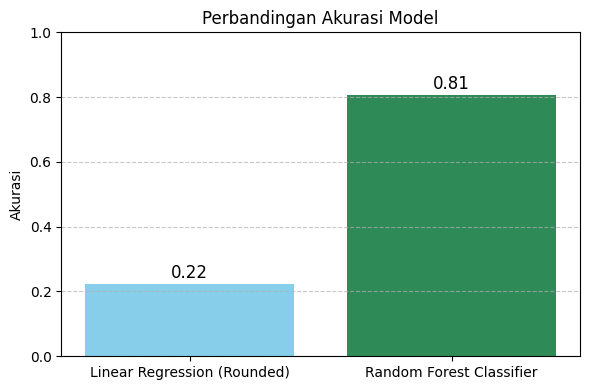

In [26]:
plt.figure(figsize=(6, 4))
models = ['Linear Regression (Rounded)', 'Random Forest Classifier']
accuracies = [acc_reg, acc_clf]

plt.bar(models, accuracies, color=['skyblue', 'seagreen'])
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Perbandingan Akurasi Model

Setelah model **Random Forest Classifier** dan **Linear Regression** dilatih dan dievaluasi, dilakukan perbandingan akurasi untuk memahami efektivitas masing-masing pendekatan terhadap data klasifikasi hujan.

- Hasil:

* **Random Forest Classifier** memberikan hasil yang **jauh lebih baik** dengan **akurasi 81%**.
* **Linear Regression** (yang bukan dirancang untuk klasifikasi, namun dicoba dengan pembulatan hasil prediksi) hanya mencapai **akurasi 22%**.

 Analisis:

* Model regresi linear **tidak cocok digunakan** untuk klasifikasi seperti ini karena:

  * Ia tidak membatasi prediksi ke kelas-kelas diskrit.
  * Pembulatan prediksi hanya memberikan hasil kasar, sering salah kelas.

* Sementara itu, **Random Forest**:

  * Mampu menangani kompleksitas dan non-linearitas antar fitur.
  * Dapat mengklasifikasikan data kategori dengan lebih tepat karena memang dirancang untuk tugas klasifikasi.

🛠 Kesimpulan:

* **Random Forest Classifier adalah pilihan yang jauh lebih baik** untuk kasus klasifikasi curah hujan ini.
* Namun, meskipun akurasinya tinggi, **performanya pada kelas "hujan sedang" masih lemah**, yang menunjukkan:

